In [1]:
%matplotlib inline
import os, pickle
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

RAW_PATH = "/data2/zhoujb/project/cowpea_project/rawData/"
SNP_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/snpDir/"
CLUSTER_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/SNPMMSeqCluster/"
RES_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/Result/"
FIG_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/plotFigure/"

In [2]:
raw_phenos = pd.read_excel(os.path.join(RAW_PATH, "BMK21067-pod.xlsx"), index_col="BMK-ID")
raw_phenos = raw_phenos.drop(columns="ID")
raw_phenos = raw_phenos.replace({"-":np.nan})
raw_phenos = raw_phenos.dropna(axis=0, how="all")

samples_score_info = pd.read_table(os.path.join(RES_PATH, "Samples_Score_Info.tsv"), index_col="Sample")
samples_score_info = samples_score_info.drop(columns=[ 'Class', 'Mis_Hap_Num'])

inte_sample_list = list(set(raw_phenos.index).intersection(samples_score_info.index.to_list()))
raw_phenos = raw_phenos.loc[inte_sample_list]
samples_score_info = samples_score_info.loc[inte_sample_list]

phenos_add_score = pd.concat([raw_phenos, samples_score_info], axis=1)

corr_pearson = phenos_add_score.corr()
corr_spearman = phenos_add_score.corr(method='spearman')

/tmp/ipykernel_425790/2745110324.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_phenos = raw_phenos.replace({"-":np.nan})


In [3]:
corr_spearman

,HZ Pod Sugar content (mg/g),GZ Pod Sugar content (mg/g),HZ Pod Starch content(mg/g),GZ Pod Strach Content (mg/g),HZ Pod Cellulose (mg/g),GZ Pod Cellulose (mg/g),HZ Pod Protein content(g/Kg),GZ Pod protein (g/Kg),HZ Seed Sugar (mg/g),GZ Seed Sugar (mg/g),...,HZ Seed Cellulose (mg/g),GZ Seed Cellulose (mg/g),HZ Seed Protein (g/kg),GZ Seed Protein (g/kg),Growth habit,Pod shattering,Hap_Score.by_Total_pop,Hap_Score.by_VL_pop,Hap_Score.by_G_pop,Hap_Score.by_VC_pop
HZ Pod Sugar content (mg/g),1.000000,0.382591,0.539882,-0.072556,0.027450,-0.175257,-0.622172,-0.305899,0.002525,0.177498,...,-0.019726,-0.060076,0.199110,-0.004677,-0.162099,-0.214623,0.445231,0.446133,0.424663,0.450122
GZ Pod Sugar content (mg/g),0.382591,1.000000,0.226843,-0.122269,0.086849,-0.288586,-0.407739,-0.499225,0.035107,0.061991,...,0.023817,-0.066029,0.362781,0.031399,-0.289994,-0.268111,0.651569,0.649028,0.626098,0.659679
HZ Pod Starch content(mg/g),0.539882,0.226843,1.000000,0.009126,0.047197,-0.028882,-0.464664,-0.277460,0.086802,0.128026,...,0.014123,-0.004068,0.064875,-0.064091,-0.162121,-0.111565,0.300885,0.301916,0.291453,0.306166
GZ Pod Strach Content (mg/g),-0.072556,-0.122269,0.009126,1.000000,-0.057659,0.433077,0.104705,-0.124143,0.068088,0.155800,...,0.065227,0.082102,-0.362958,-0.353173,0.198657,0.217423,-0.230858,-0.229516,-0.232903,-0.231541
HZ Pod Cellulose (mg/g),0.027450,0.086849,0.047197,-0.057659,1.000000,-0.039011,-0.286402,-0.160360,0.014981,-0.007380,...,0.079413,0.030504,0.142096,-0.077280,-0.097109,-0.076599,0.189741,0.191861,0.183349,0.184064
GZ Pod Cellulose (mg/g),-0.175257,-0.288586,-0.028882,0.433077,-0.039011,1.000000,0.163101,0.005006,0.070536,0.089297,...,0.053771,0.166255,-0.385704,-0.235416,0.157895,0.302239,-0.346204,-0.347470,-0.322627,-0.347708
HZ Pod Protein content(g/Kg),-0.622172,-0.407739,-0.464664,0.104705,-0.286402,0.163101,1.000000,0.392325,-0.014280,-0.155027,...,0.000776,0.005119,-0.154189,0.023268,0.282230,0.210383,-0.464238,-0.465834,-0.436831,-0.472328
GZ Pod protein (g/Kg),-0.305899,-0.499225,-0.277460,-0.124143,-0.160360,0.005006,0.392325,1.000000,-0.018108,-0.117639,...,-0.102586,-0.080761,-0.134905,0.309962,0.208031,0.192620,-0.516505,-0.517806,-0.496038,-0.521989
HZ Seed Sugar (mg/g),0.002525,0.035107,0.086802,0.068088,0.014981,0.070536,-0.014280,-0.018108,1.000000,0.265106,...,-0.009373,-0.040995,0.014668,-0.052105,0.092392,0.051562,0.043827,0.044078,0.039869,0.043635
GZ Seed Sugar (mg/g),0.177498,0.061991,0.128026,0.155800,-0.007380,0.089297,-0.155027,-0.117639,0.265106,1.000000,...,0.021769,-0.078242,-0.020001,-0.096402,0.025441,-0.055875,0.046865,0.046231,0.030030,0.047031


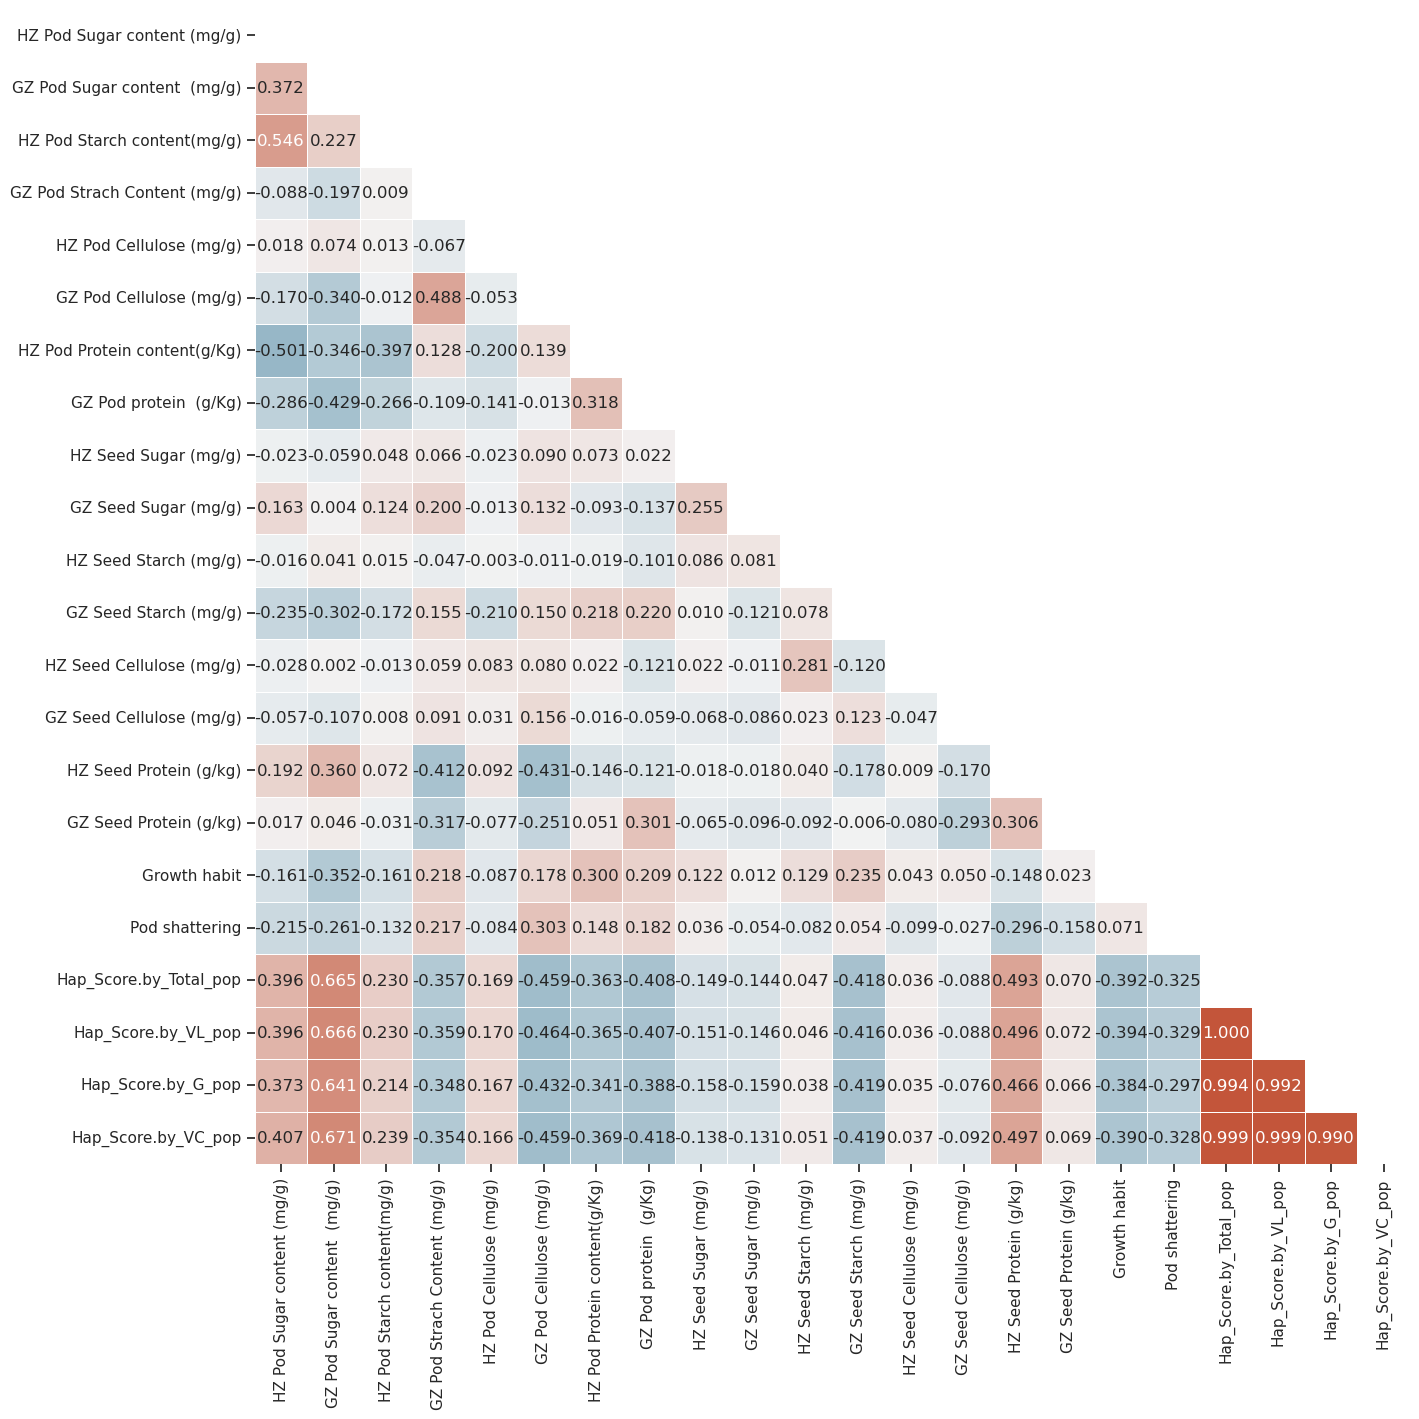

In [4]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_pearson, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.set(font_scale=1, rc={'figure.figsize':(15,15)}, style="ticks")
g = sns.heatmap(corr_pearson, mask=mask, cmap=cmap, cbar=False, 
                vmax=1, center=0, vmin=-1,
                annot=True, fmt='.3f', square=True,
                linewidths=0.5)

#plt.savefig(os.path.join(FIG_PATH, '4-corr_pearson_400.pdf'), format='pdf', bbox_inches='tight', transparent=True)#